In [3]:
# 1. 문제 정의
# 평가: RMSE
# targert: price
# 최종 파일: result.csv(컬럼 1개 pred)

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv('flight_train.csv')
test = pd.read_csv('flight_test.csv')

# 3. 탐색적 데이터 분석(EDA)
print("===== 데이터 크기 =====")
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)


print("\n===== 데이터 정보(자료형) =====")
print(train.info())
      
print("\n===== train 결측치 수 =====")
print(train.isnull().sum().sum())

print("\n===== test 결측치 수 =====")
print(test.isnull().sum().sum())

print("\n===== 카테고리 비교 =====")
cols = train.select_dtypes(include='object').columns
for col in cols:
    set_train = set(train[col])
    set_test = set(test[col])
    same = (set_train == set_test)
    if same:
        print(col, "\t카테코리 동일함")
    else:
        print(col, "\t카테고리 동일하지 않음")

print("\n===== target 기술 통계 =====")
print(train['price'].describe())

===== 데이터 크기 =====
Train Shape: (10505, 11)
Test Shape: (4502, 10)

===== 데이터 정보(자료형) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  object 
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 902.9+ KB
None

===== train 결측치 수 =====
0

===== test 결측치 수 =====
0

===== 카테고리 비교 =====
airline 	카테코리 동일함
flight 	카테고리 동일하지 않음
source

<Axes: >

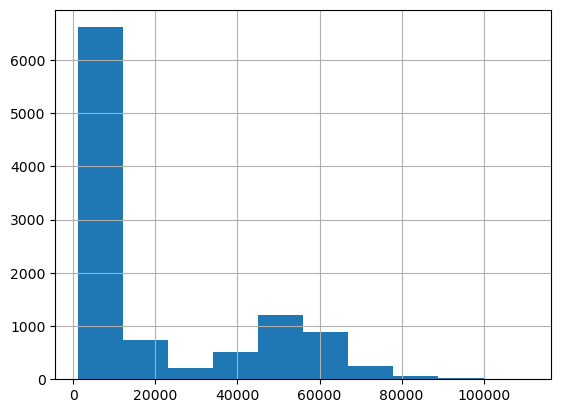

In [5]:
train['price'].hist()  # 시험 환경에서는 지원 X

In [7]:
# 4. 데이터 전처리
target = train.pop('price')

# 컬럼 삭제
train = train.drop('flight', axis=1)
test = test.drop('flight', axis=1)

# 원-핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 5. 검증 데이터 나누기
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

print("\n===== 분할된 데이터 크기 =====")
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

from sklearn.metrics import root_mean_squared_error
result = root_mean_squared_error(y_val, pred)
print('\n rmse:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

# 제출 파일 확인
print("\n===== 제출 파일(샘플 5개) =====")
print(pd.read_csv("result.csv").head())


===== 분할된 데이터 크기 =====
(8404, 37) (2101, 37) (8404,) (2101,)

 rmse: 4376.841613585934

===== 제출 파일(샘플 5개) =====
       pred
0  57356.34
1   5334.44
2  13244.83
3   5951.10
4   5102.89


In [13]:
# 성능 개선

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv('flight_train.csv')
test = pd.read_csv('flight_test.csv')

# 4. 데이터 전처리
target = train.pop('price')

# flight 컬럼 일부 사용
train['f2'] = train['flight'].str.split('-').str[1].astype(int)
test['f2'] = test['flight'].str.split('-').str[1].astype(int)

# 컬럼 삭제
train = train.drop('flight', axis=1)
test = test.drop('flight', axis=1)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['duration', 'days_left']
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

# 원-핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 5. 검증 데이터 나누기
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

print("\n===== 분할된 데이터 크기 =====")
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

from sklearn.metrics import root_mean_squared_error
result = root_mean_squared_error(y_val, pred)
print('\n rmse:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)


===== 분할된 데이터 크기 =====
(8404, 38) (2101, 38) (8404,) (2101,)

 rmse: 3675.155093297134
